In [18]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [38]:
for i in range(1,6):
    dTrain = "/content/data_batch_"+str(i)
    with open(dTrain, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    dTrain = dict    
    dataTrain = np.vstack([dataTrain, dTrain['data']])
    labelTrain = np.hstack([labelTrain, dTrain['labels']])

dTest = "/content/test_batch"
with open(dTest, 'rb') as fo:
    dict = pickle.load(fo, encoding='latin1')

dTest = dict

dataTest = dTest['data']
labelTest = dTest['labels']
labelTest = np.array(labelTest)

l1

In [36]:
X_train, Y_train = dataTrain[:1000,:] , labelTrain[:1000]

In [43]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
k_accuracy = {}
X_train_folds = np.array_split(X_train, num_folds)
Y_train_folds = np.array_split(Y_train, num_folds)
print("length of x_train_folds", len(X_train_folds))
print("X_train shape", type(X_train[0]))
print("X_train len", X_train_folds[0].shape)

length of x_train_folds 5
X_train shape <class 'numpy.ndarray'>
X_train len (200, 3072)


In [44]:
for k in k_choices:
    k_accuracy[k] = []
    for index in range(num_folds):
        X_t = X_train_folds[index]
        Y_t = Y_train_folds[index]
        
        X_tr = np.reshape( np.array(X_train_folds[:index] + X_train_folds[index + 1:]),
                                (int(X_train.shape[0] * (num_folds - 1) / num_folds), -1) )
        Y_tr = np.reshape(Y_train_folds[:index] + Y_train_folds[index + 1:],
                              int(X_train.shape[0] * (num_folds - 1) / num_folds))
        
        
        dists = np.zeros((X_t.shape[0],X_tr.shape[0]))

        for i in range(X_t.shape[0]):
            dists[i] = np.sum( np.abs(X_tr- X_t[i]), axis=1)        
        
        y_pred = np.zeros(dists.shape[0])
        for i in range(dists.shape[0]):            
            closest_y = Y_tr[np.argsort(dists[i, :])[:k]]            
            y_pred[i] = np.argmax(np.bincount(closest_y))
        
        
        y_t_pred = y_pred
        accuracy = np.mean(y_t_pred == Y_t)
        k_accuracy[k].append(accuracy)
       
for k, accuracylist in k_accuracy.items():
    for accuracy in accuracylist:
        print("k = %d, accuracy = %.3f" % (k, accuracy))

k = 1, accuracy = 0.135
k = 1, accuracy = 0.155
k = 1, accuracy = 0.235
k = 1, accuracy = 0.210
k = 1, accuracy = 0.245
k = 3, accuracy = 0.145
k = 3, accuracy = 0.165
k = 3, accuracy = 0.205
k = 3, accuracy = 0.160
k = 3, accuracy = 0.210
k = 5, accuracy = 0.110
k = 5, accuracy = 0.125
k = 5, accuracy = 0.215
k = 5, accuracy = 0.190
k = 5, accuracy = 0.205
k = 8, accuracy = 0.125
k = 8, accuracy = 0.135
k = 8, accuracy = 0.205
k = 8, accuracy = 0.195
k = 8, accuracy = 0.150
k = 10, accuracy = 0.145
k = 10, accuracy = 0.160
k = 10, accuracy = 0.205
k = 10, accuracy = 0.195
k = 10, accuracy = 0.185
k = 12, accuracy = 0.135
k = 12, accuracy = 0.130
k = 12, accuracy = 0.215
k = 12, accuracy = 0.190
k = 12, accuracy = 0.190
k = 15, accuracy = 0.130
k = 15, accuracy = 0.140
k = 15, accuracy = 0.205
k = 15, accuracy = 0.210
k = 15, accuracy = 0.210
k = 20, accuracy = 0.110
k = 20, accuracy = 0.150
k = 20, accuracy = 0.210
k = 20, accuracy = 0.205
k = 20, accuracy = 0.205
k = 50, accuracy = 0

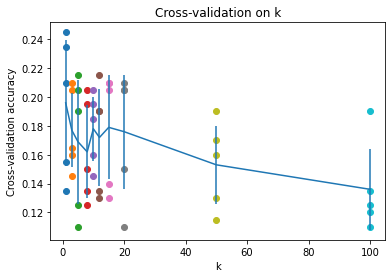

In [45]:
for k in k_choices:
    accuracies = k_accuracy[k]
    plt.scatter([k] * len(accuracies), accuracies)
mean_accuracy = np.array([np.mean(v) for k, v in sorted(k_accuracy.items())])
std_accuracy = np.array([np.std(v) for k, v in sorted(k_accuracy.items())])
    
plt.errorbar(k_choices,mean_accuracy, yerr=std_accuracy)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()

l2

In [55]:
X_train, Y_train = dataTrain[:1000,:] , labelTrain[:1000]

In [52]:
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
k_accuracy = {}
X_train_folds = np.array_split(X_train, num_folds)
y_train_folds = np.array_split(Y_train, num_folds)
print("length of x_train_folds", len(X_train_folds))
print("X_train shape", type(X_train[0]))
print("X_train len", X_train_folds[0].shape)

length of x_train_folds 5
X_train shape <class 'numpy.ndarray'>
X_train len (200, 3072)


In [53]:
for k in k_choices:
    k_accuracy[k] = []
    for index in range(num_folds):
        X_t = X_train_folds[index]
        Y_t = y_train_folds[index]
        
        X_tr = np.reshape( np.array(X_train_folds[:index] + X_train_folds[index + 1:]),
                                (int(X_train.shape[0] * (num_folds - 1) / num_folds), -1) )
        Y_tr = np.reshape(y_train_folds[:index] + y_train_folds[index + 1:],
                              int(X_train.shape[0] * (num_folds - 1) / num_folds))
        
        
        
        
        dists = np.zeros((X_t.shape[0], X_tr.shape[0]))

        value_2xy = np.multiply(X_t.dot(X_tr.T), -2)
        value_x2 = np.sum(np.square(X_t), axis=1, keepdims=True)
        value_y2 = np.sum(np.square(X_tr), axis=1)
        dists = value_2xy + value_x2 + value_y2   
            
            
            
            
        
        y_pred = np.zeros(dists.shape[0])
        for i in range(dists.shape[0]):            
            closest_y = Y_tr[np.argsort(dists[i, :])[:k]]            
            y_pred[i] = np.argmax(np.bincount(closest_y))
        
        
        y_t_pred = y_pred
        accuracy = np.mean(y_t_pred == Y_t)
        k_accuracy[k].append(accuracy)
       
for k, accuracylist in k_accuracy.items():
    for accuracy in accuracylist:
        print("k = %d, accuracy = %.3f" % (k, accuracy))

k = 1, accuracy = 0.110
k = 1, accuracy = 0.055
k = 1, accuracy = 0.115
k = 1, accuracy = 0.140
k = 1, accuracy = 0.125
k = 3, accuracy = 0.070
k = 3, accuracy = 0.105
k = 3, accuracy = 0.110
k = 3, accuracy = 0.140
k = 3, accuracy = 0.085
k = 5, accuracy = 0.070
k = 5, accuracy = 0.105
k = 5, accuracy = 0.110
k = 5, accuracy = 0.140
k = 5, accuracy = 0.085
k = 8, accuracy = 0.070
k = 8, accuracy = 0.105
k = 8, accuracy = 0.110
k = 8, accuracy = 0.140
k = 8, accuracy = 0.085
k = 10, accuracy = 0.070
k = 10, accuracy = 0.105
k = 10, accuracy = 0.110
k = 10, accuracy = 0.140
k = 10, accuracy = 0.085
k = 12, accuracy = 0.070
k = 12, accuracy = 0.105
k = 12, accuracy = 0.110
k = 12, accuracy = 0.140
k = 12, accuracy = 0.085
k = 15, accuracy = 0.070
k = 15, accuracy = 0.105
k = 15, accuracy = 0.105
k = 15, accuracy = 0.060
k = 15, accuracy = 0.085
k = 20, accuracy = 0.070
k = 20, accuracy = 0.140
k = 20, accuracy = 0.105
k = 20, accuracy = 0.060
k = 20, accuracy = 0.085
k = 50, accuracy = 0

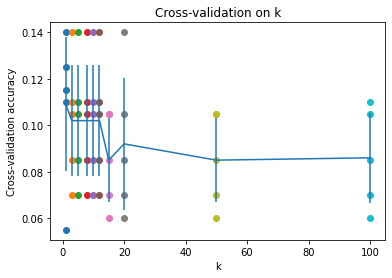

In [54]:
for k in k_choices:
    accuracies = k_accuracy[k]
    plt.scatter([k] * len(accuracies), accuracies)
mean_accuracy = np.array([np.mean(v) for k, v in sorted(k_accuracy.items())])
std_accuracy = np.array([np.std(v) for k, v in sorted(k_accuracy.items())])
    
plt.errorbar(k_choices, mean_accuracy, yerr=std_accuracy)
plt.title('Cross-validation on k')
plt.xlabel('k')
plt.ylabel('Cross-validation accuracy')
plt.show()